## House price project 

In [1]:
# Business understanding
# Problem statement: To predict the sales price for each house

# Data understanding
#Data contains 81 columns. that means there are 80 factors which decides the price of house.
#From general understanding, important features which effects the price of house could be:
    1. MSSubClass: The building class
    2. LotArea: Lot size in square feet
    3. Neighborhood: Physical locations within Ames city limits
    4. Condition1: Proximity to main road or railroad
    5. Condition2: Proximity to main road or railroad (if a second is present)
    6. OverallQual: Overall material and finish quality
    7. OverallCond: Overall condition rating
    8. YearBuilt: Original construction date
    9. HouseStyle: Style of dwelling
    10.TotalBsmtSF: Total square feet of basement area
    11. Bedroom: Number of bedrooms above basement level
    12. Functional: Home functionality rating
    13. GarageType: Garage location
    14. OpenPorchSF: Open porch area in square feet

# Data loading


In [2]:
import os
data_location= "D:\Data science - vidya\kaggle -house price - linear regression"
Train_file_location = data_location + '/train.csv'
Train_file_location

'D:\\Data science - vidya\\kaggle -house price - linear regression/train.csv'

In [3]:
# let me read the train file

In [4]:
import pandas as pd

In [5]:
Train_data = pd.read_csv(Train_file_location)

In [6]:
# looking at the data i can dropout the following columns
# Alley - Few entry, MSZoning, Street, LandContou, Utilities, PoolArea, PoolQC, Fence, MiscFeature, MiscFeature, MiscVal
#RoofMatl, Exterior1st, Exterior2nd and so on. 



In [7]:
Train_data.shape

(1460, 81)

In [8]:
pd.set_option('display.max_columns', None)

# Data Exploration

In [9]:
df = Train_data 

In [10]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [11]:
# let me select the some parameters to dermine the sale price
columns_df = df[['MSSubClass','LotArea','Neighborhood','Condition1','Condition2','OverallQual','OverallCond','YearBuilt','HouseStyle','BedroomAbvGr','Functional','OpenPorchSF','SalePrice']]

In [12]:
columns_df.head()

,MSSubClass,LotArea,Neighborhood,Condition1,Condition2,OverallQual,OverallCond,YearBuilt,HouseStyle,BedroomAbvGr,Functional,OpenPorchSF,SalePrice
0,60,8450,CollgCr,Norm,Norm,7,5,2003,2Story,3,Typ,61,208500
1,20,9600,Veenker,Feedr,Norm,6,8,1976,1Story,3,Typ,0,181500
2,60,11250,CollgCr,Norm,Norm,7,5,2001,2Story,3,Typ,42,223500
3,70,9550,Crawfor,Norm,Norm,7,5,1915,2Story,3,Typ,35,140000
4,60,14260,NoRidge,Norm,Norm,8,5,2000,2Story,4,Typ,84,250000


In [13]:
import matplotlib.pyplot as plt
import pylab as pl

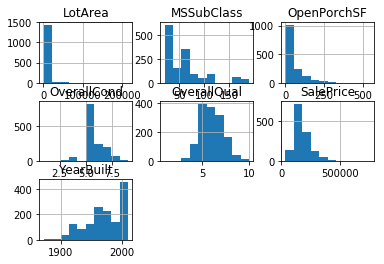

In [14]:
columns_df_viz = columns_df[['MSSubClass','LotArea','YearBuilt','HouseStyle','OverallQual','OverallCond','Functional','HouseStyle','OpenPorchSF','SalePrice']]
columns_df_viz.hist()
plt.show()

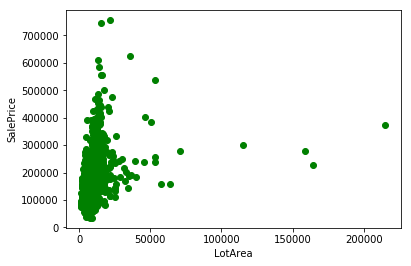

In [15]:
plt.scatter(columns_df.LotArea, columns_df.SalePrice,  color='green')
plt.xlabel("LotArea")
plt.ylabel("SalePrice")
plt.show()

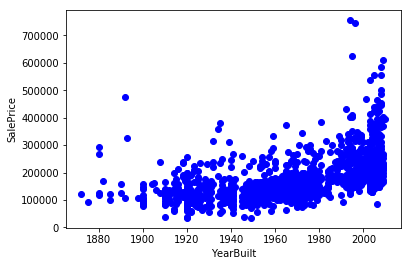

In [16]:
plt.scatter(columns_df.YearBuilt, columns_df.SalePrice,  color='blue')
plt.xlabel("YearBuilt")
plt.ylabel("SalePrice")
plt.show()

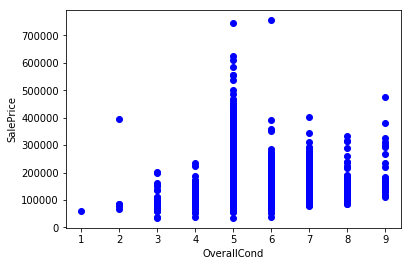

In [17]:
plt.scatter(columns_df.OverallCond, columns_df.SalePrice,  color='blue')
plt.xlabel("OverallCond")
plt.ylabel("SalePrice")
plt.show()

# Train/Test data set

In [19]:
# model 1 : considering lotarea as independent variable
from sklearn.model_selection import train_test_split
import numpy as np

In [66]:
X_train, y_train,X_test,y_test=train_test

array([False, False,  True, ...,  True,  True,  True])

In [24]:
msk = np.random.rand(len(df)) < 0.8
trainset = columns_df[msk]
testset = columns_df[~msk]


#  linear rigression model


# Modelling

In [49]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
train_x = np.asanyarray(trainset[['MSSubClass','LotArea','YearBuilt','OverallQual','OverallCond','OpenPorchSF']])
train_y = np.asanyarray(trainset[['SalePrice']])
regr.fit (train_x, train_y)
# The coefficients
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[-1.50524823e+02  1.74329305e+00  3.41874491e+02  3.98817102e+04
   3.12074420e+03  6.70288237e+01]]
Intercept:  [-766254.9204714]


Text(0, 0.5, 'SalePrice')

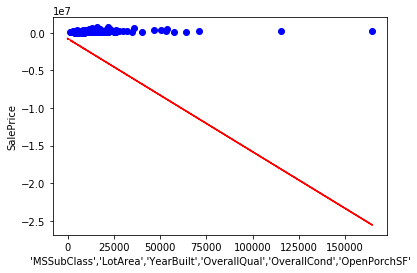

In [53]:
plt.scatter(trainset.LotArea, trainset.SalePrice,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("'MSSubClass','LotArea','YearBuilt','OverallQual','OverallCond','OpenPorchSF'")
plt.ylabel("SalePrice")

In [57]:
train_x_.shape

(1188, 1)

In [58]:
train_x.shape

(1188, 6)

In [63]:
train_x.columns

AttributeError: 'numpy.ndarray' object has no attribute 'columns'

In [68]:
from sklearn.metrics import r2_score

train_x = np.asanyarray(trainset[['MSSubClass','LotArea','YearBuilt','OverallQual','OverallCond','OpenPorchSF']])
train_y = np.asanyarray(trainset[['SalePrice']])
train_y_pred = regr.predict(train_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(train_y_pred - train_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((train_y - train_y_pred) ** 2))
print("R2-score: %.2f" % r2_score(train_y_pred , train_y) )

Mean absolute error: 30759.59
Residual sum of squares (MSE): 2117104143.85
R2-score: 0.52


# Evaluation

In [ ]:
from sklearn.metrics import r2_score

test_x = np.asanyarray(testset[['LotArea']])
test_y = np.asanyarray(testset[['SalePrice']])
test_y_ = regr.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )